In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv
import datetime
import os

In [14]:
pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
appnope==0.1.0
appscript==1.0.1
asn1crypto==1.0.1
astroid==2.3.1
astropy==3.2.2
atomicwrites==1.3.0
attrs==19.2.0
Babel==2.7.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.8.0
bitarray==1.0.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.3.4
boto==2.49.0
Bottleneck==1.2.1
certifi==2019.9.11
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
clyent==1.2.2
colorama==0.4.1
conda==4.9.1
conda-build==3.18.9
conda-package-handling==1.7.0
conda-verify==3.4.2
contextlib2==0.6.0
cryptography==2.7
cycler==0.10.0
Cython==0.29.13
cytoolz==0.10.0
dask==2.5.2
decorator==4.4.0
defusedxml==0.6.0
distributed==2.5.2
docutils==0.15.2
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
Flask==1.1.1
fsspec==0.5.2
future==0.18.2
gevent==1.4.0
glob2==0.7
gmpy2==2.0

In [18]:
data = pd.read_csv('./CustomerUncleanedData.csv')

AttributeError: module 'pandas' has no attribute 'read_csv'

In [ ]:
data.shape

In [16]:
data.dropna(inplace=True)

NameError: name 'data' is not defined

In [17]:
drop_neg = data[data['number_of_orders'] > 0]

NameError: name 'data' is not defined

In [141]:
drop_neg.head()

,customer,Store Assignment,Date,number_of_orders
1,C27752,S4904,3/23/20,1.0
2,C61524,S9152,3/24/20,2.0
3,C83437,S8154,3/26/20,1.0
4,C27752,S9152,3/30/20,1.0
5,C61524,S2413,4/1/20,1.0


In [142]:
drop_big = drop_neg[drop_neg['number_of_orders'] <= 100]

In [143]:
drop_big.head()

,customer,Store Assignment,Date,number_of_orders
1,C27752,S4904,3/23/20,1.0
2,C61524,S9152,3/24/20,2.0
3,C83437,S8154,3/26/20,1.0
4,C27752,S9152,3/30/20,1.0
5,C61524,S2413,4/1/20,1.0


In [144]:
drop_big['Date'] = pd.to_datetime(drop_big['Date'], format='%m/%d/%y')
now = datetime.datetime.now()
current_year = now.year
drop_big = drop_big[drop_big['Date'].dt.year == current_year]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
drop_big.head()

,customer,Store Assignment,Date,number_of_orders
1,C27752,S4904,2020-03-23,1.0
2,C61524,S9152,2020-03-24,2.0
3,C83437,S8154,2020-03-26,1.0
4,C27752,S9152,2020-03-30,1.0
5,C61524,S2413,2020-04-01,1.0


In [146]:
df_agg_day = drop_big.groupby([drop_big['Date'].dt.date]).sum().reset_index()

In [147]:
df_agg_day.head()

,Date,number_of_orders
0,2020-01-01,41.0
1,2020-01-02,45.0
2,2020-01-04,45.0
3,2020-01-05,661.0
4,2020-01-06,576.0


In [148]:
#divide into train and validation set
train = df_agg_day[:int(0.85*(len(df_agg_day)))]
test = df_agg_day[int(0.85*(len(df_agg_day))):]

In [149]:
train.index = train.Date 
test.index = test.Date

In [150]:
train.head()

,Date,number_of_orders
Date,,
2020-01-01,2020-01-01,41.0
2020-01-02,2020-01-02,45.0
2020-01-04,2020-01-04,45.0
2020-01-05,2020-01-05,661.0
2020-01-06,2020-01-06,576.0


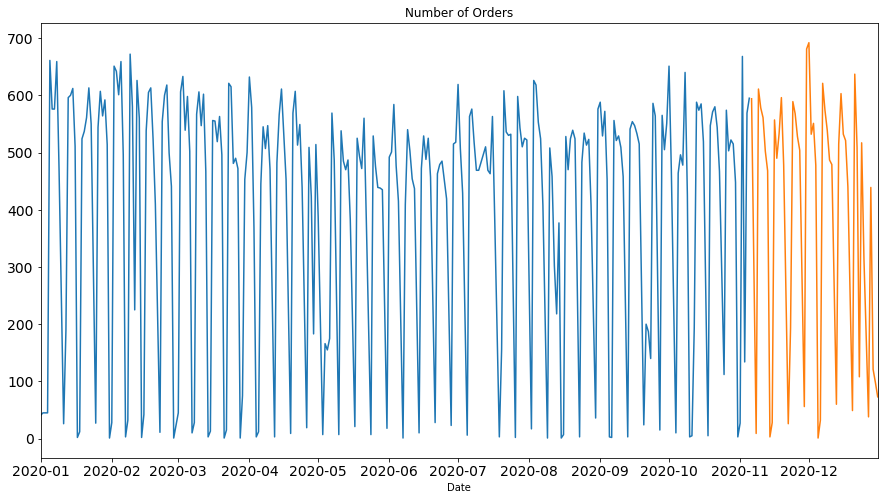

In [151]:
#Plotting data
train['number_of_orders'].plot(figsize=(15,8), title= 'Number of Orders', fontsize=14)
test['number_of_orders'].plot(figsize=(15,8), title= 'Number of Orders', fontsize=14)
plt.show()

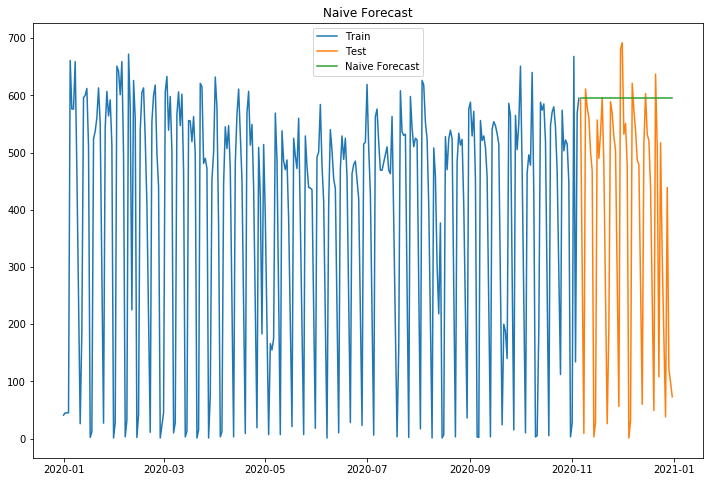

In [152]:
dd= np.asarray(train['number_of_orders'])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['number_of_orders'], label='Train')
plt.plot(test.index,test['number_of_orders'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


In [153]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test['number_of_orders'], y_hat.naive))
print(rms)

304.32456358302727


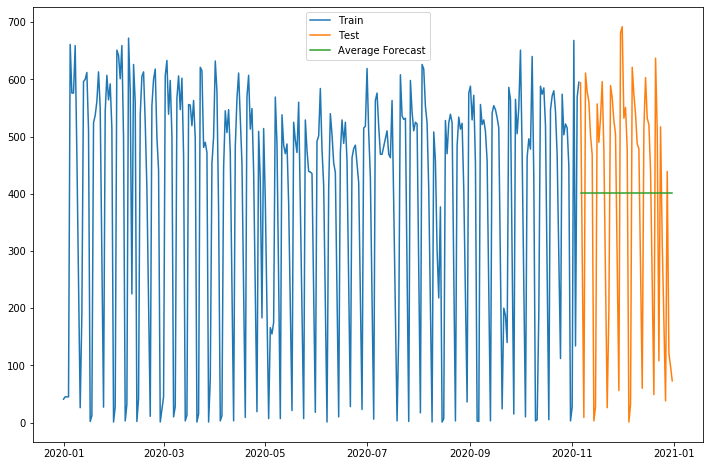

In [123]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['number_of_orders'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['number_of_orders'], label='Train')
plt.plot(test['number_of_orders'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [124]:
rms = sqrt(mean_squared_error(test['number_of_orders'], y_hat_avg.avg_forecast))
print(rms)

228.86665544784188


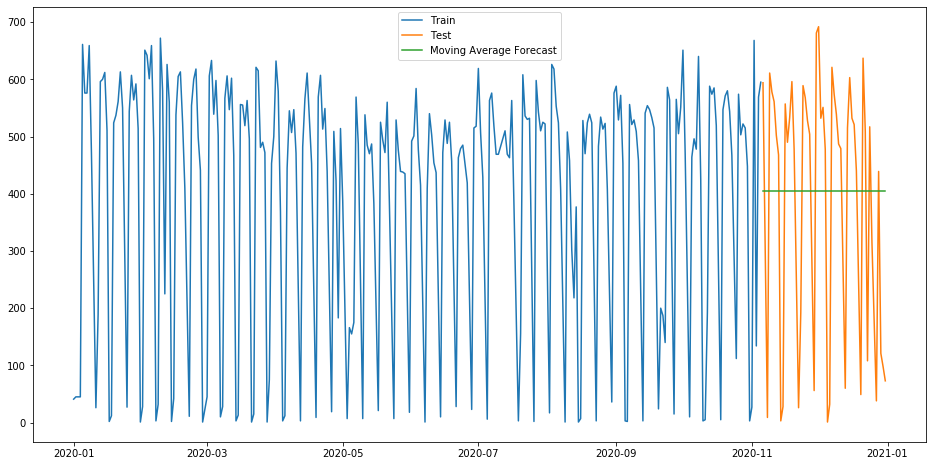

In [125]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['number_of_orders'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['number_of_orders'], label='Train')
plt.plot(test['number_of_orders'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [126]:
rms = sqrt(mean_squared_error(test['number_of_orders'], y_hat_avg.moving_avg_forecast))
print(rms)

228.950716312485


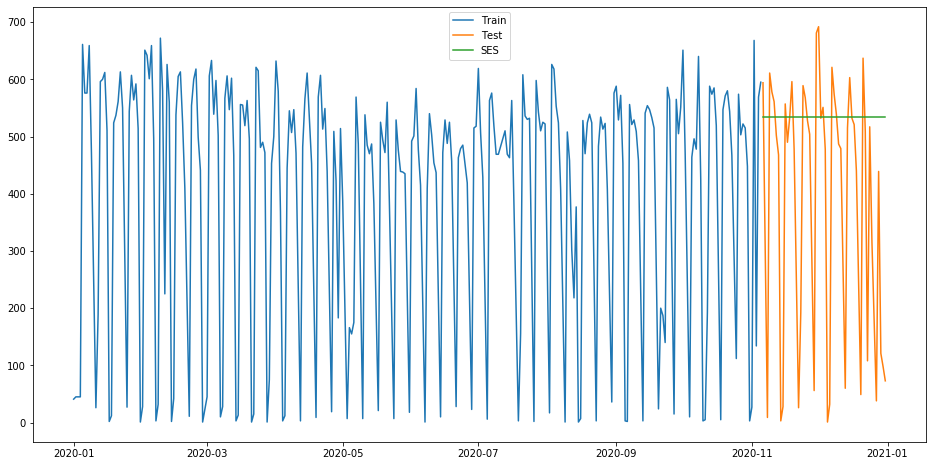

In [127]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['number_of_orders'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['number_of_orders'], label='Train')
plt.plot(test['number_of_orders'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [128]:
rms = sqrt(mean_squared_error(test['number_of_orders'], y_hat_avg.SES))
print(rms)

268.27559223846515


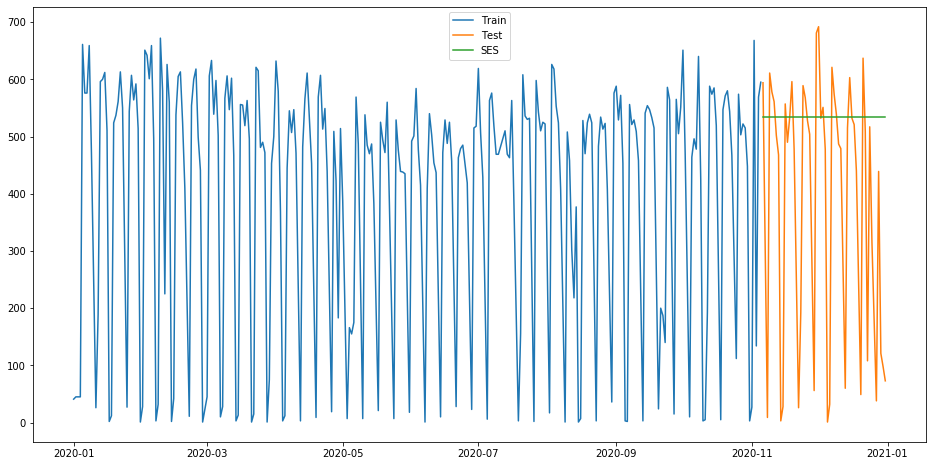

In [129]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['number_of_orders'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['number_of_orders'], label='Train')
plt.plot(test['number_of_orders'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [130]:
rms = sqrt(mean_squared_error(test['number_of_orders'], y_hat_avg.SES))
print(rms)

268.27559223846515


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


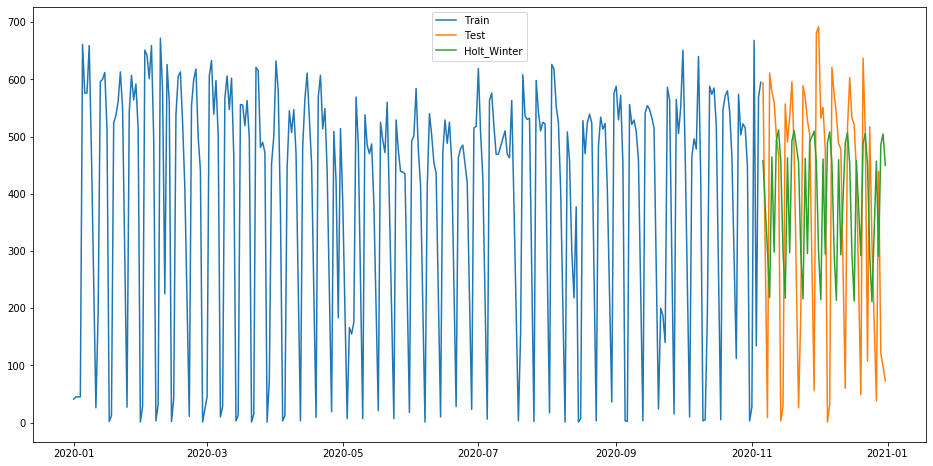

In [135]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['number_of_orders']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['number_of_orders'], label='Train')
plt.plot(test['number_of_orders'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [98]:
rms = sqrt(mean_squared_error(test['number_of_orders'], y_hat_avg.Holt_Winter))
print(rms)

273.0416858437006


In [103]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train['number_of_orders'], order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2020-01-01", end="2020-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['number_of_orders'], label='Train')
plt.plot(test['number_of_orders'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'